In [ ]:
import math
import numpy as np
import pandas as pd
import statistics
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
sns.set()
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('climate_change.csv')
df.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


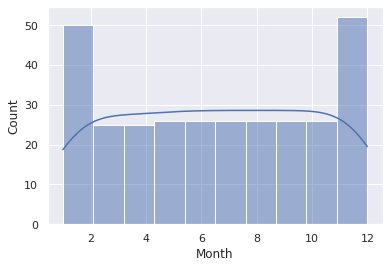

In [ ]:
#Observations
#We can say that the data is the most from the 12th month of the year, followed by the first month and then the others.

sns.histplot(df.Month,kde=True)

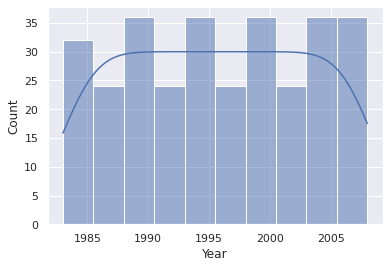

In [ ]:
#similarly for the year column
sns.histplot(df.Year,kde=True)

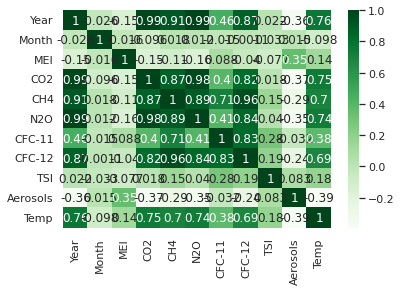

In [ ]:
#This table gives a correlation between different parameters of the data with one another
#Correlation refers to the rate at which one feature affects the other
data = df.corr()
sns.heatmap(data, cmap='Greens', annot=True)

In [ ]:
#Splitting the data into training (80%) and testing (20%)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=0)

In [ ]:
len(train_data)

246

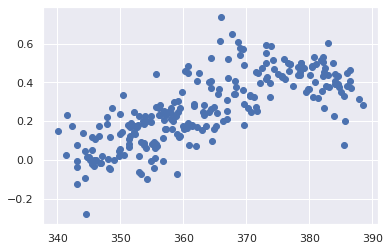

In [ ]:
#Plotting the points on the graph
X1 = train_data.iloc[:,3]
Y1 = train_data.iloc[:,10]

plt.scatter(X1, Y1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys


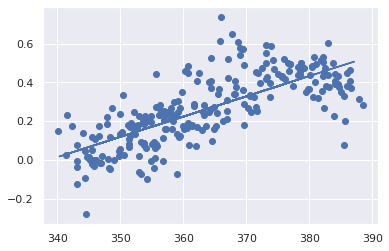

In [ ]:
#Linear regression to understand the relation between CO2(independent variable) and Temp(Dependent Variable)
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X1[:, np.newaxis], Y1)

xfit = test_data.iloc[:,3]
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(X1, Y1)
plt.plot(xfit, yfit)

#from the graph we can conclude that CO2 and temperature are approximately proportional to one another.
#As CO2 increases, the temperature increases 

In [ ]:
#R-square score for CO2 vs TEMP (single variable)
X_test = test_data.iloc[:,3]
Y_test = test_data.iloc[:,10]

print(model.score(xfit[:, np.newaxis], Y_test))
print(model.coef_)

0.6203938569860509
[0.01046908]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


In [ ]:
data.columns

Index(['Year', 'Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI',
       'Aerosols', 'Temp'],
      dtype='object')

In [ ]:
#Now we consider all the variables (simultaneosly) affecting the temperature and 
#determine their significane in the effect
x = df[['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI',
       'Aerosols']]
y = df[['Temp']]
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     108.6
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           8.21e-84
Time:                        17:45:31   Log-Likelihood:                 303.02
No. Observations:                 308   AIC:                            -588.0
Df Residuals:                     299   BIC:                            -554.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -127.6958     19.191     -6.654      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
x_train = train_data[['MEI','CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols']]
y_train = train_data['Temp']

x_test = test_data[['MEI','CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols']]
y_test = test_data['Temp']

mlr = LinearRegression()  
mlr.fit(x_train, y_train)

print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  -124.96569636188556
Coefficients:


[('MEI', 0.06693529448142155),
 ('CO2', 0.004170934303581691),
 ('CH4', 2.76741842566465e-05),
 ('N2O', -0.019400443696378347),
 ('CFC-11', -0.008565825424122953),
 ('CFC-12', 0.005172761358147812),
 ('TSI', 0.09466165464764041),
 ('Aerosols', -1.5583283217436787)]

In [ ]:
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 0.00833482  0.45333806  0.32035545  0.18549945  0.29772647  0.26024605
  0.34834396  0.00210711  0.01328475  0.01229301  0.45488459  0.12484243
  0.39703341  0.17171704 -0.04246809  0.33925564  0.48207017  0.45172358
  0.43504239  0.452327    0.30964526  0.02999622  0.18714303  0.13691139
  0.38455831  0.05505244  0.18866127  0.53758464  0.21847201  0.20260124
  0.39868547  0.52306189  0.2105695   0.44632212  0.49467068  0.20884555
  0.36155649  0.45418057  0.23302812  0.47815027  0.17477176  0.02139489
  0.21407699  0.00706016  0.21895883 -0.03428431  0.20935456  0.35623409
  0.21057134  0.47603081  0.29911427  0.47029893  0.49369522  0.01354523
  0.12945259  0.15563692  0.45017129  0.02565892  0.16210568 -0.00273264
 -0.03981675  0.43086001]


In [ ]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
63,0.154,0.008335
247,0.519,0.453338
293,0.362,0.320355
124,0.013,0.185499
188,0.366,0.297726


In [ ]:
model.intercept_

0.3039933073085451

In [ ]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 74.14
Mean Absolute Error: 0.07324967197372342
Mean Square Error: 0.007589769269369214
Root Mean Square Error: 0.0871192818460369


In [ ]:
r = np.corrcoef(train_data['N2O'], train_data['MEI'])
print("The correlation coefficient is: " + str(r[1][0]))

r = np.corrcoef(train_data['N2O'], train_data['CO2'])
print("The correlation coefficient is: " + str(r[1][0]))

r = np.corrcoef(train_data['N2O'], train_data['CH4'])
print("The correlation coefficient is: " + str(r[1][0]))

r = np.corrcoef(train_data['N2O'], train_data['N2O'])
print("The correlation coefficient is: " + str(r[1][0]))

r = np.corrcoef(train_data['N2O'], train_data['CFC-11'])
print("The correlation coefficient is: " + str(r[1][0]))

r = np.corrcoef(train_data['N2O'], train_data['CFC-12'])
print("The correlation coefficient is: " + str(r[1][0]))

r = np.corrcoef(train_data['N2O'], train_data['TSI'])
print("The correlation coefficient is: " + str(r[1][0]))

r = np.corrcoef(train_data['N2O'], train_data['Aerosols'])
print("The correlation coefficient is: " + str(r[1][0]))

The correlation coefficient is: -0.2237714040273809
The correlation coefficient is: 0.9812646171786611
The correlation coefficient is: 0.8897920322888824
The correlation coefficient is: 0.9999999999999998
The correlation coefficient is: 0.3771123636767464
The correlation coefficient is: 0.8305394746597222
The correlation coefficient is: -0.02589480567194664
The correlation coefficient is: -0.3585654019165288


In [ ]:
x_train_1 = train_data[['MEI', 'N2O', 'TSI', 'Aerosols']]
y_train_1 = train_data['Temp']
x_test_1 = test_data[['MEI', 'N2O', 'TSI', 'Aerosols']]
y_test_1 = test_data['Temp']
x_1 = df[['MEI', 'N2O', 'TSI', 'Aerosols']]
y_1 = df[['Temp']]

In [ ]:
X2_train_1 = sm.add_constant(x_train_1)
est_train_1 = sm.OLS(y_train_1, X2_train_1)
est2_1 = est_train_1.fit()
print(est2_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     144.7
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           7.41e-63
Time:                        18:18:23   Log-Likelihood:                 221.53
No. Observations:                 246   AIC:                            -433.1
Df Residuals:                     241   BIC:                            -415.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -138.8113     22.353     -6.210      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x_train_1, y_train_1)

LinearRegression()

In [ ]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x_1, mlr.coef_))

Intercept:  -138.81133459232458
Coefficients:


[('MEI', 0.07197705080571974),
 ('N2O', 0.0245734358074576),
 ('TSI', 0.09619119051813034),
 ('Aerosols', -1.8500866867732624)]

In [ ]:
#Prediction of test set
y_pred_mlr_1= mlr.predict(x_test_1)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr_1))

Prediction for test set: [ 0.01543039  0.44891758  0.35543312  0.18930156  0.27550449  0.20806139
  0.38124291  0.02991249  0.01473886  0.0468104   0.48349145  0.18221202
  0.38348883  0.19460766 -0.02734269  0.3099386   0.45858331  0.42895915
  0.42233893  0.45314096  0.25659865  0.01446687  0.24179463  0.13881842
  0.38324624 -0.00438662  0.20488327  0.51877986  0.17667845  0.2566255
  0.38360999  0.49589368  0.18426922  0.43267728  0.49392269  0.16859167
  0.31793821  0.42802955  0.2088858   0.47416072  0.20875873  0.03779803
  0.17391548  0.02456356  0.20893605 -0.10369257  0.21614916  0.31043113
  0.21731633  0.46499829  0.27897035  0.45603415  0.49393722 -0.04404138
  0.13416197  0.14694276  0.45019656  0.05157851  0.12675969  0.01661048
 -0.01427038  0.40982382]


In [ ]:
mlr_diff_1 = pd.DataFrame({'Actual value': y_test_1, 'Predicted value': y_pred_mlr_1})
mlr_diff_1.head()

,Actual value,Predicted value
63,0.154,0.015430
247,0.519,0.448918
293,0.362,0.355433
124,0.013,0.189302
188,0.366,0.275504


In [ ]:
meanAbErr = metrics.mean_absolute_error(y_test_1, y_pred_mlr_1)
meanSqErr = metrics.mean_squared_error(y_test_1, y_pred_mlr_1)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test_1, y_pred_mlr_1))
print('R squared: {:.2f}'.format(mlr.score(x_1,y_1)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 71.52
Mean Absolute Error: 0.06759734181311984
Mean Square Error: 0.006870689997446577
Root Mean Square Error: 0.08288962539091715


In [ ]:
from scipy import stats

CATEGORICAL_VARIABLES = ['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols']
for i in CATEGORICAL_VARIABLES:
  correlation = stats.pointbiserialr(df[i], df["Temp"])
  print(i, correlation)


MEI PointbiserialrResult(correlation=0.13529168433351066, pvalue=0.017518659805993233)
CO2 PointbiserialrResult(correlation=0.7485046457380211, pvalue=1.557880415620173e-56)
CH4 PointbiserialrResult(correlation=0.6996965803638929, pvalue=1.3362989047670364e-46)
N2O PointbiserialrResult(correlation=0.7432418337360966, pvalue=2.3517474412415498e-55)
CFC-11 PointbiserialrResult(correlation=0.3801113416532199, pvalue=5.031362179050227e-12)
CFC-12 PointbiserialrResult(correlation=0.6889441088656743, pvalue=1.1179206572557341e-44)
TSI PointbiserialrResult(correlation=0.18218560682875684, pvalue=0.0013215404069405788)
Aerosols PointbiserialrResult(correlation=-0.392069446275214, pvalue=9.283071094401667e-13)


It was seen that the variables 'CFC_12', 'Aerosols', 'CFC_11', 'MEI', 'TSI' are significant in the model i.e. their p-value is below 0.05

##Problem 2.1

All of the gas concentration variables reflect human development - N2O and CFC.11 are correlated with other variables in the data set. To verify this, I experimented with removing/adding some of the variables and found that the coefficient values varied, showing that it was dependent on the coefficient values of other variables. The variables CO2, CH4, CFC_12 and Temp are having high correlation with N20 (absolute correlation greater than 0.7) The variables CH4, CFC_12 are having high correlation with CFC_11 (absolute correlation greater than 0.7)

In [ ]:
#Sort variables based on p-value and determine the gas that affects the temperature the most
#which is the most dangeropus green house

## Problem 3

> Indented block



The coefficient of N2O in this reduced model is 0.02399865. The r2 value obtained by this model is 0.6338 which is quiet low. Also, the previous model had no N2O variable as its independent variable.